In [63]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('callcenter_marketing.csv')

In [64]:
dataset.head()

dataset.isnull().sum() # Mostra a quantidade de nulos

idade                             0
profissao                       330
estado_civil                     80
educacao                       1731
inadimplente                   8597
emprestimo_moradia              990
emprestimo_pessoal              990
meio_contato                      0
mes                               0
dia_da_semana                     0
duracao                           0
qtd_contatos_campanha             0
dias_ultimo_contato               0
qtd_contatos_total                0
campanha_anterior                 0
indice_precos_consumidor          0
indice_confianca_consumidor       0
euribor3m                         0
resultado                         0
dtype: int64

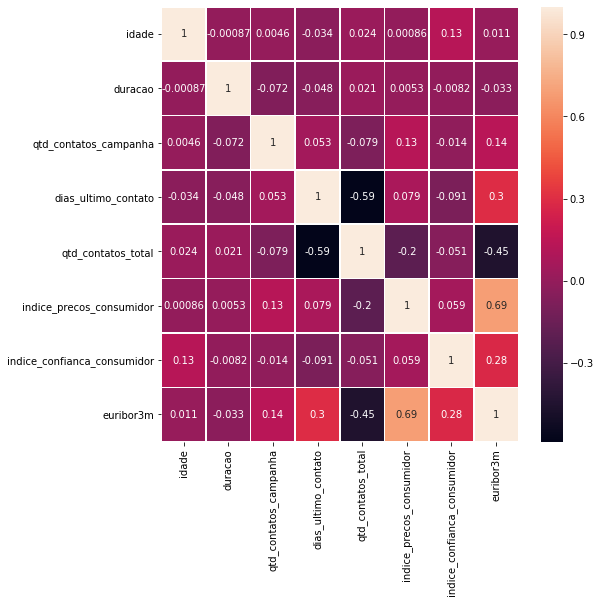

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

ig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, ax=ax)

In [66]:
dataset_numerico = dataset[['idade', 'duracao', 'qtd_contatos_campanha', 'dias_ultimo_contato', 'qtd_contatos_total', 'indice_precos_consumidor', 'indice_confianca_consumidor','euribor3m']]

dataset_categorico = dataset[['profissao', 'estado_civil', 'educacao', 'inadimplente', 'emprestimo_moradia', 'emprestimo_pessoal', 'meio_contato', 'mes', 'dia_da_semana', 'campanha_anterior']]

## Dealing with null values

In [67]:
for nome_coluna in dataset_categorico.columns:
    dataset_categorico[nome_coluna].fillna('NAO_INFORMADO',  inplace = True)

/home/anologicon/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [68]:
dataset_categorico.head()

,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,campanha_anterior
0,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,nao_existente
1,servicos,casado,ensino_medio,NAO_INFORMADO,nao,nao,telefone,mai,seg,nao_existente
2,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,nao_existente
3,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,nao_existente
4,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,nao_existente


In [69]:
dataset_categorico_corrigido = pd.get_dummies(dataset_categorico)
dataset_categorico_corrigido.head()

,profissao_NAO_INFORMADO,profissao_admin.,profissao_aposentado,profissao_colarinho_azul,profissao_desempregado,profissao_dona_casa,profissao_empreendedor,profissao_estudante,profissao_gerente,profissao_informal,...,mes_out,mes_set,dia_da_semana_qua,dia_da_semana_qui,dia_da_semana_seg,dia_da_semana_sex,dia_da_semana_ter,campanha_anterior_fracasso,campanha_anterior_nao_existente,campanha_anterior_sucesso
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Joinin training Data

In [70]:
dataset_concat = pd.concat([dataset_categorico_corrigido, dataset_numerico], axis = 1)
dataset_concat.head()

,profissao_NAO_INFORMADO,profissao_admin.,profissao_aposentado,profissao_colarinho_azul,profissao_desempregado,profissao_dona_casa,profissao_empreendedor,profissao_estudante,profissao_gerente,profissao_informal,...,campanha_anterior_nao_existente,campanha_anterior_sucesso,idade,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor,euribor3m
0,0,0,0,0,0,1,0,0,0,0,...,1,0,56,261,1,999,0,93.994,-36.4,4.857
1,0,0,0,0,0,0,0,0,0,0,...,1,0,57,149,1,999,0,93.994,-36.4,4.857
2,0,0,0,0,0,0,0,0,0,0,...,1,0,37,226,1,999,0,93.994,-36.4,4.857
3,0,1,0,0,0,0,0,0,0,0,...,1,0,40,151,1,999,0,93.994,-36.4,4.857
4,0,0,0,0,0,0,0,0,0,0,...,1,0,56,307,1,999,0,93.994,-36.4,4.857


In [71]:
from sklearn.model_selection import train_test_split

def categorize(value):
    if(value == 'nao'):
        return 0
    return 1

dataset['resultado'] = dataset['resultado'].apply(categorize)

dataset_numerico_concat_resultado = pd.concat([dataset_numerico, dataset['resultado']], axis = 1)

In [72]:
# Este é o target
y = dataset['resultado']
X = dataset_concat.iloc[:]
# Divide os dados em 30% de x e y para teste. O random diz que eles vão seguir o masmo random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
# reseting index
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [74]:
from sklearn.linear_model import LinearRegression

def categorizeNew(value):
    if value <= 0.5: 
        return 0 # not admitted
    return 1 # admitted

lr = LinearRegression()# crio o modelo
lr.fit(X_train,y_train)# faco o fit do modelo(reta)

previsto = lr.predict(X_test)#predicao nos dados teste

serie_prevista = pd.Series(previsto) 
serie_prevista = serie_prevista.apply(categorizeNew)

print('O acerto percentual é: '+
str((
np.count_nonzero(serie_prevista.values==y_test)
/serie_prevista.size)*100))

O acerto percentual é: 90.45884923525126


In [75]:
# regressao logística

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
logreg.fit(X_train, y_train )
acuracia_logistica = logreg.score(X_test, y_test)
display(logreg.score(X_test, y_test))


from sklearn import tree
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

#Predição
y_pred = clf_dt.predict(X_test)
acuracia_dt = clf_dt.score(X_test,y_test)

acuracia_dt


/home/anologicon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9105770008901837

0.890102775754633